In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-10-20 23:23:35.670462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 23:23:35.869484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-20 23:23:35.869511: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-20 23:23:35.902051: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-20 23:23:37.082507: W tensorflow/stream_executor/platform/de

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

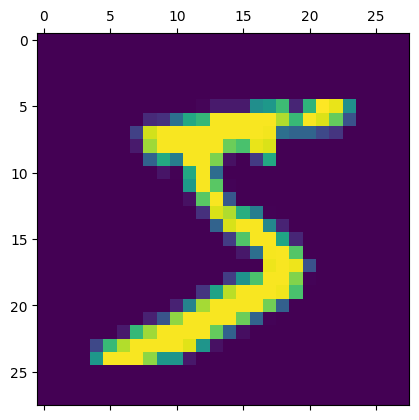

In [3]:
# len(X_train)
# X_train.shape
plt.matshow(X_train[0])

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [6]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

2022-10-20 23:23:44.541654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-20 23:23:44.541797: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-20 23:23:44.541892: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karthikeya): /proc/driver/nvidia/version does not exist
2022-10-20 23:23:44.588593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-20 23:23:45.624603: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceed

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4691 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2726 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9263


In [8]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2701 - accuracy: 0.9247


[0.2701207995414734, 0.9247000217437744]

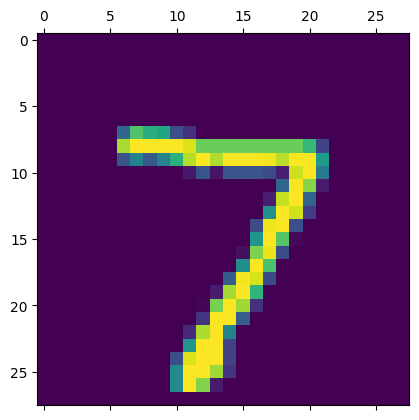

In [9]:
plt.matshow(X_test[0])

In [10]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 978us/step


In [11]:
np.argmax(y_pred[0])

7

In [12]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [13]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    1,    0,    4,    4,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   8,    9,  921,   18,    7,    5,   10,    9,   40,    5],
       [   3,    0,   18,  925,    1,   27,    2,    8,   19,    7],
       [   2,    1,    7,    2,  917,    0,    8,    3,    9,   33],
       [  11,    3,    4,   29,    6,  791,   10,    4,   28,    6],
       [  15,    3,   10,    1,    8,   14,  902,    2,    3,    0],
       [   2,    6,   23,   12,    8,    1,    0,  931,    3,   42],
       [   9,    9,    6,   30,   10,   35,    8,    8,  850,    9],
       [  11,    7,    1,   11,   30,    9,    0,   11,    4,  925]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

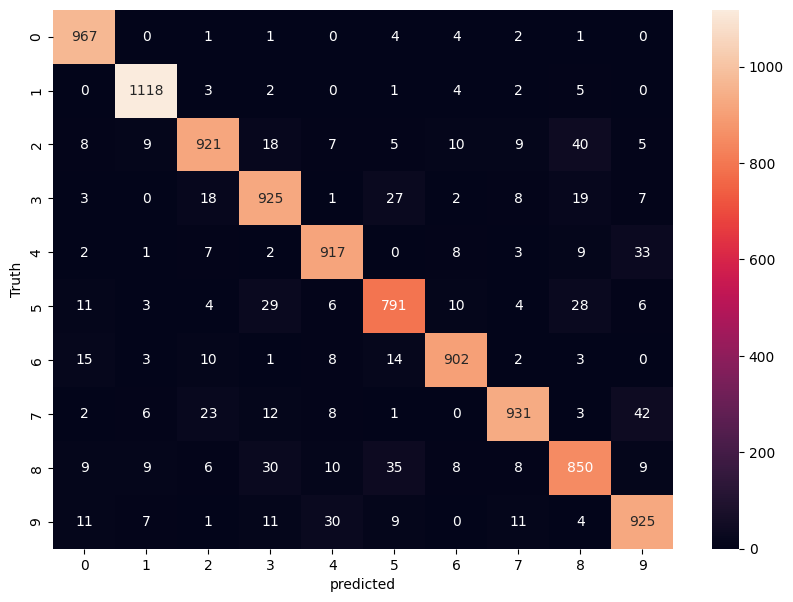

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=7)

Epoch 1/7


2022-10-20 23:24:08.949529: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2699 - accuracy: 0.9233
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9622
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9736
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0656 - accuracy: 0.9807
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9833
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9866
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0346 - accuracy: 0.9893


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9776


[0.07593414187431335, 0.9775999784469604]

In [17]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

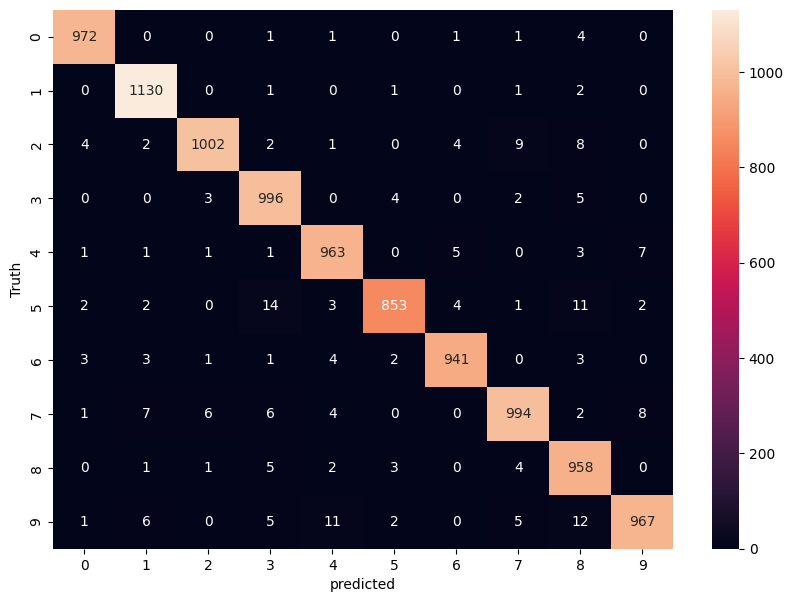

In [18]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='selu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)
model.fit(X_train,y_train, epochs=5)

Epoch 1/5


2022-10-20 23:26:11.935116: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2362 - sparse_categorical_accuracy: 0.9311
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0725 - sparse_categorical_accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9851


In [23]:
number_labels = ['zero','one','two','three','four','five','six','seven','eight','nine']
y_pred = model.predict(X_test)
y_pred_labels = [number_labels[np.argmax(i)] for i in y_pred]
print(y_pred_labels[0])

313/313 [==============================] - 1s 2ms/step
seven
[[5.5074841e-02 3.9719768e-02 1.9402237e-01 ... 9.9999887e-01
  1.8387488e-01 8.0927145e-01]
 [1.6417571e-03 9.9998623e-01 9.9999994e-01 ... 5.6075619e-04
  1.3741186e-01 6.8482535e-07]
 [1.4450250e-02 9.9999797e-01 9.5862573e-01 ... 7.9222822e-01
  6.0908180e-01 4.5397930e-02]
 ...
 [4.0970670e-04 9.6596432e-01 2.0934120e-03 ... 9.3491548e-01
  9.1434771e-01 9.9986798e-01]
 [1.8121962e-02 9.6186584e-01 1.2170727e-02 ... 6.8866216e-02
  9.9809957e-01 1.6974613e-02]
 [9.1369605e-01 9.1490263e-01 1.2744810e-01 ... 1.1542858e-02
  7.9600140e-03 8.1460184e-04]]
